# Activité 1 : Bernoulli

In [2]:
import pandas as pd
df = pd.read_csv("Dataset_composants_defectueux.csv")

total_composants = len(df)
defectueux = df["defectueux"].sum()
p_estime = defectueux / total_composants

print(f"Composants analysés : {total_composants}")
print(f"Composants défectueux : {defectueux}")
print(f"Taux de défectuosité estimé : {p_estime:.4f} ({p_estime*100:.2f}%)")

Composants analysés : 969
Composants défectueux : 70
Taux de défectuosité estimé : 0.0722 (7.22%)


# Activité 2 : Binomiale

Proportion moyenne de défauts : 0.0995 (9.95%)


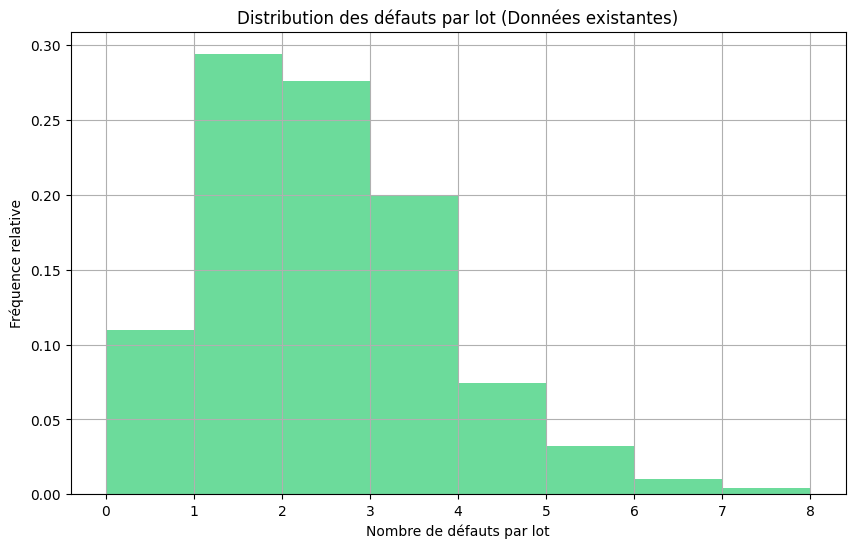


Probabilité théorique (≥5 défauts): 1.0000
Taux de rejet réel: 0.0460

Taux de défauts maximal pour 5% de rejet:  None
[0.9999998316984495, 0.9999999324848268, 0.99999997312979, 0.9999999893863359, 0.999999995837686, 0.999999998378881, 0.9999999993727691, 0.9999999997588525, 0.999999999907853, 0.9999999999649964, 0.9999999999867791, 0.9999999999950341, 0.9999999999981448, 0.9999999999993106, 0.9999999999997451, 0.9999999999999062, 0.9999999999999657, 0.9999999999999875, 0.9999999999999954, 0.9999999999999983, 0.9999999999999994, 0.9999999999999998, 0.9999999999999999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

df = pd.read_csv("Dataset_lot_puce_defectueuses.csv")

# Conversion en valeur binaire
df['defect_bin'] = df['défectueux'].apply(lambda x: 1 if x == 'Défectueux' else 0)

# ---------------------------
# 2. Proportion moyenne de défauts
# ---------------------------
total_defauts = df['defect_bin'].sum()
total_puces = len(df)
p_moyen = total_defauts / total_puces

print(f"Proportion moyenne de défauts : {p_moyen:.4f} ({p_moyen*100:.2f}%)")

# ---------------------------
# 3. Distribution des défauts par lot
# ---------------------------
defects_per_lot = df.groupby('lot_id')['defect_bin'].sum()

plt.figure(figsize=(10, 6))
plt.hist(defects_per_lot, bins=range(0, max(defects_per_lot)+2), density=True, alpha=0.7, color='#2ecc71')
plt.title('Distribution des défauts par lot (Données existantes)')
plt.xlabel('Nombre de défauts par lot')
plt.ylabel('Fréquence relative')
plt.grid(True)
plt.show()

# ---------------------------
# 4. Probabilité théorique (≥5 défauts)
# ---------------------------
n = 500  # Puces par lot
p = 0.1 # Probabilité théorique initiale

prob_theorique = 1 - binom.cdf(4, n=n, p=p)
print(f"\nProbabilité théorique (≥5 défauts): {prob_theorique:.4f}")

# ---------------------------
# 5. Taux de rejet réel (données existantes)
# ---------------------------
lots_problematiques = sum(defects_per_lot >= 5)
taux_rejet = lots_problematiques / len(defects_per_lot)
print(f"Taux de rejet réel: {taux_rejet:.4f}")

# ---------------------------
# 6. Calcul du taux de défauts maximal admissible
# ---------------------------
def trouver_p_max(target=0.05):
    for p in np.linspace(0.05, 0.15, 100):
        prob = 1 - binom.cdf(4, n=n, p=p)
        if prob <= target:
            return p
    return None

p_max = trouver_p_max()
print("\nTaux de défauts maximal pour 5% de rejet: ", p_max)

# ---------------------------
# Visualisation comparative
# ---------------------------
p_values = np.linspace(0.05, 0.15, 50)
rejet_rates = [1 - binom.cdf(4, n=n, p=p) for p in p_values]

print(rejet_rates)